<a href="https://colab.research.google.com/github/sourceworker/PolynomialApproximation/blob/main/PolynomialApproximationClass.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


# Аппроксимация функции многочленом n-ой степени


# 1. Импорт библиотек

In [ ]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

# 2. Создание классов для демонстрации ООП

In [ ]:
#Класс для аппроксимации функции многочленами n-ой степени и создания графиков.
class PolynomialApproximation:

    '''
    Конструктор класса

    Параметры:
        - degree (int): Степень многочлена для аппроксимации (по умолчанию 1);
        - self.x_values (array): Массив значений точек x, который используется для построения графиков. (по умолчанию содержит 100 равномерно распределенных значений в диапазоне от 1 до 15);
        - title (str): Заголовок графика (по умолчанию "Multiple Graphs");
        - x_label (str): Название оси графика X (по умолчанию "x");
        - y_label (str): Название оси графика Y (по умолчанию "y");
        - self.plots: Список, используемый для хранения информации о графиках (по умолчанию пустой).
    '''
    def __init__(self, degree=1, title="Multiple Graphs", x_label="x", y_label="y"):
        self.degree = degree
        self.x_values = np.linspace(1, 15, 100)
        self.title = title
        self.x_label = x_label
        self.y_label = y_label
        self.plots = []

    """
    Метод вычисления значения целевой функции f(x) для заданного x.

    Входные параметры:
        - x (float): Значение x.

    Возвращаемые параметры:
        - Значение целевой функции f(x).
    """
    def f(self, x):
        #При необходимости можно заменить на любую другую функцию
        return np.sin(x / 5) * np.exp(x / 10) + 5 * np.exp(-x / 2)

    """
    Метод построения графика исходной функции f(x) и внесения значений целевой функции в список 'self.plots'.

    Примечание:
        Если вы хотите сравнить графически результаты аппроксимации с целевой функцией, то метод должен быть вызван перед методами аппрокисмации для внесения значений целевой функции в список 'self.plots'.
        Метод может использоваться для визуального анализа данных целевой функции, так как возвращает график целевой функции.
    """
    def plot_function(self):
        plt.plot(self.x_values, self.f(self.x_values), label='f(x)', color='blue')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.legend()
        plt.show()
        self.add_plot(self.x_values, self.f(self.x_values), label='f(x)')

    '''
    Метод аппроксимации функции с использованием многочлена заданной степени.

    Входные параметры:
        - x_points (list): Список точек, через которые должен проходить многочлен.

    Возвращаемые параметры:
        - Коэффициенты многочлена.

    Примечание:
        Применяется проверка для входящих данных. Использование матричного метода при нахождении коэффициентов накладывает ограничения на входные данные, а именно многочлен степени 𝑛 однозначно определяется любыми  𝑛+1 различными точками, через которые он проходит.
    '''
    def approximate(self, x_points):
        n = self.degree + 1
        if len(x_points) < n:
            raise ValueError(f"Недостаточно или избыток точек для многочлена степени {self.degree}. Необходимо {n} точек.")
        A = np.array([[(x ** i) for i in range(0, n)] for x in x_points])
        b = np.array([self.f(x) for x in x_points])
        w = linalg.solve(A, b)
        return w

    '''
    Метод формирования функции f(x) многочлена для заданного x_values и вычисления значения функции f(x_values).

    Входные параметры:
        - x_values (float): Значение x;
        - w (array): Коэффициенты многочлена.

    Возвращаемые параметры:
        - Выводится вид многочлена для заданной степени аппроксимации;
        - Значение многочлена f(x_values).
    '''
    def polynomial_values(self, x_values, w):
        # Создаем многочлен с использованием коэффициентов в обратном порядке, так как функция 'polyval' вычисляет значение многочлена, в котором степень идёт от старшей к младшей.
        p = np.poly1d(w[::-1])
        print(f'Вид многочлена степени {self.degree}:\n',p)
        return np.polyval(p, x_values)

    '''
    Метод построения графика найденного многочлена апрроксимации функции.

    Входные параметры:
        - x_points (list): Список точек, на которых выполняется аппроксимация.

    Примечание:
        Внесение значений точек для построения графика 'x' и вычисленных значений многочлена 'f(x)' происходит за счёт обращения к функции 'add_plot'.
    '''
    def plot_approximation(self, x_points):
        w = self.approximate(x_points)
        self.add_plot(self.x_values, self.polynomial_values(self.x_values, w), label=f'Аппроксимация (степень {self.degree})')

    '''
    Метод добавления значений для графика с заданными x_values, y_values и названием.

    Входные параметры:
        - x_values (list): Список значений x для графика;
        - y_values (list): Список значений y для графика;
        - label (str): Название для графика функции.

    Примечание:
        Вы можете использовать метод для добавления отдельного набора значений точек графика некоторой функции 'x' и 'y'.
        Обратите внимание, так как у нас график функции, то каждому 'y' соответствует своё значение 'x'!
    '''
    def add_plot(self, x_values, y_values, label):
        if len(x_values) != len(y_values):
            raise ValueError(f"Недостаточно или избыток точек для формирования графика. Добавьте или удалите значения для {abs(len(y_values) - len(x_values))} точек.")
        self.plots.append((x_values, y_values, label))

    '''
    Метод для отображения всех добавленных графиков в одном окне.
    '''
    def show(self):
        if not self.plots:
            print("Отсутствуют графики для отображения.")
            return

        plt.figure(figsize=(12, 8))
        for x_values, y_values, label in self.plots:
            plt.plot(x_values, y_values, label=label)

        plt.title(self.title)
        plt.xlabel(self.x_label)
        plt.ylabel(self.y_label)
        plt.legend()
        plt.show()

    '''
    Метод для очищения информации о графиках в списке 'self.plots'

    Примечание:
        Будьте внимательны, так как метод удаляет абсолютно всю информацию о ранее добавленных значений графиков.
    '''
    def clear(self):
        self.plots = []

    '''
    Метод изменения степени многочлена для аппроксимации функции.

    Входные параметры:
        - new_degree (int): Новая степень многочлена.
    '''
    def change_degree(self, new_degree):
        self.degree = new_degree

# 3. Пример использования класса

Для аппроксимации и визуализации функций:
- создайте экземпляр класса 'PolynomialApproximation';
- задайте степень многочлена;
- вызывайте методы для построения графиков и аппроксимации функции.

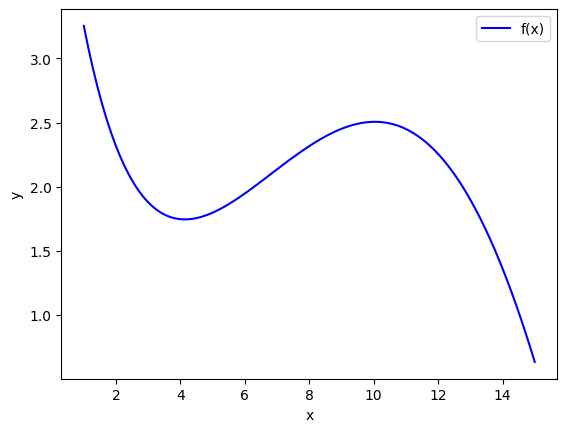

Вид многочлена степени 2:
           2
-0.03708 x + 0.4064 x + 2.883


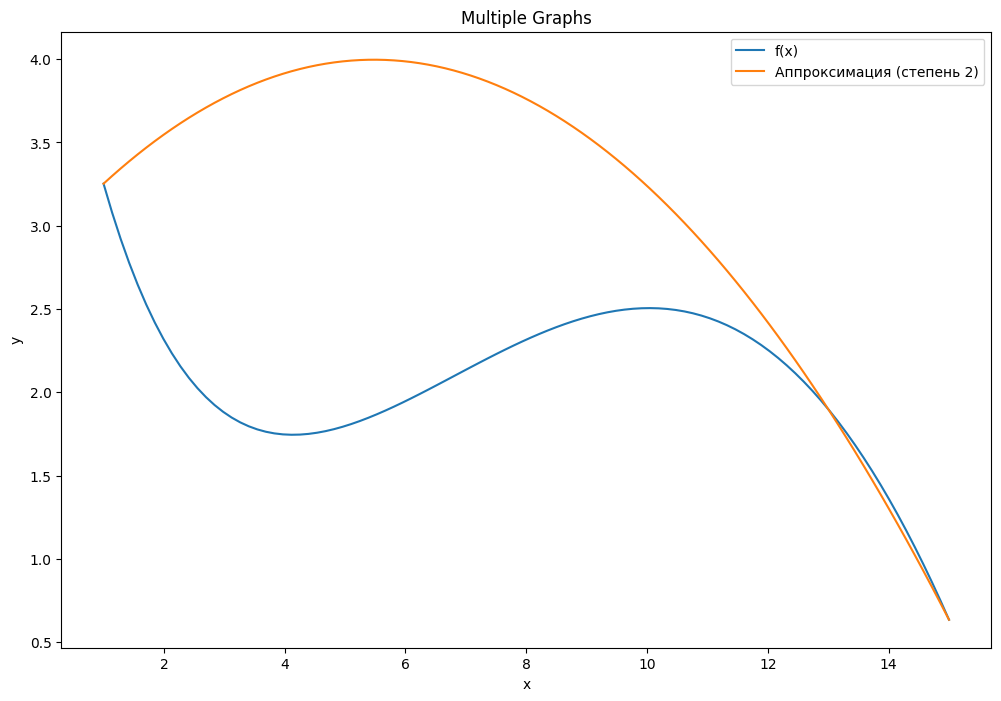

Вид многочлена степени 3:
            3          2
-0.007301 x + 0.1746 x - 1.222 x + 4.307


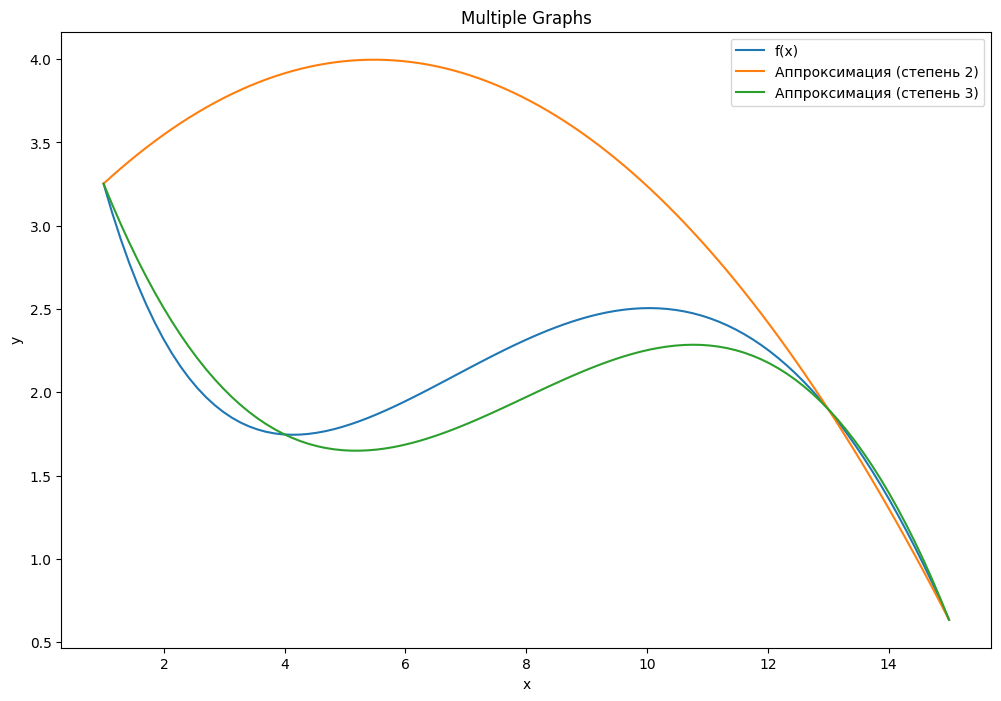

In [ ]:
'''
Код, находящийся внутри блока 'if __name__ == "__main__":', будет выполнен только при запуске этого файла как самостоятельной программы. Если этот файл будет импортирован как модуль в другой программе, код не будет выполнен при импорте.
'''
if __name__ == "__main__":
    approximator = PolynomialApproximation(degree=2) #Создание экземпляра класса 'PolynomialApproximation' и передача параметра степени '2'

    approximator.plot_function() #Обращение к методу для построения графика целевой функции и добавления информации в общий список графиков
    x_points = [1, 13, 15] #Задание точек, через которые проходит многочлен
    approximator.plot_approximation(x_points) #Обращение к методу для аппроксимации функции в точках x_points и добавления функции многочлена в общий список графиков
    approximator.show() #Обращение к методу отображения всех графиков

    #Дополнительный пример
    approximator.change_degree(3) #Изменение степени многочлена в экземпляре класса
    x_points = [1, 4, 13, 15]
    approximator.plot_approximation(x_points)
    approximator.show()